# Classification Workshop

### Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.utils import split_samples

%matplotlib inline

### First, let's load up the data

In [2]:
data = np.load("SDSS_sample.npz")['array1']
print(data.dtype)
print("There are", len(data), "objects")

[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('class', '<i8')]
There are 100000 objects


### Now, let's take a look at a sample of the data, to see what we're dealing with

In [3]:
# Print the first 5 objects
print(data.dtype.names)
print(data[0:5])

('u', 'g', 'r', 'i', 'z', 'class')
[( 18.55948,  17.31544,  16.71859,  16.32946,  16.09309, 2)
 ( 19.37655,  19.09841,  18.98511,  18.71276,  18.73387, 3)
 ( 19.55025,  19.23416,  19.12857,  18.88795,  18.92883, 3)
 ( 19.346  ,  17.24572,  16.2121 ,  15.77169,  15.40704, 2)
 ( 19.18425,  18.51466,  18.13073,  18.13962,  18.02939, 3)]


In [4]:
print("We have", len(np.unique(data['class'])), "unique classes\n")
print("These correspond to:")
print("\t1 - Star")
print("\t2 - Galaxy")
print("\t3 - QSO")

We have 3 unique classes

These correspond to:
	1 - Star
	2 - Galaxy
	3 - QSO


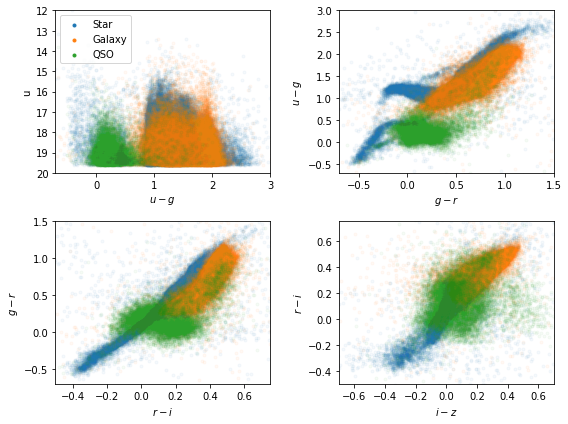

In [5]:
fig, ax = plt.subplots(2,2, figsize=(8,6))

classes = ['Star', 'Galaxy', 'QSO']
labels = ['u', '$u-g$', '$g-r$', '$r-i$', '$i-z$']
colors = ['C0', 'C1', 'C2']
vals = [data['u'], data['u']-data['g'], data['g']-data['r'], data['r']-data['i'], data['i']-data['z']]
limits = [(20, 12), (-0.7,3), (-0.7, 1.5), (-0.5, 0.75), (-0.7, 0.7)]

# Iterate through all four panels
for i in range(2):
    for j in range(2):
        
        # Running index
        k = 2*i + j
        
        # Iterate through all three classes
        for m in range(3):
            ax[i,j].scatter(vals[k+1][data['class'] == m+1], vals[k][data['class'] == m+1], 
                            color=colors[m], marker='.', alpha=0.04, label=classes[m], rasterized=True)
        

        # Add labels for x- and y-axes
        ax[i,j].set_xlabel(labels[k+1])
        ax[i,j].set_ylabel(labels[k])
        
        # Set plot range
        ax[i,j].set_xlim(limits[k+1])
        ax[i,j].set_ylim(limits[k])

        
# Add legend
leg = ax[0,0].legend(loc=0)

# To make legend markers visible
for lh in leg.legendHandles: 
    lh.set_alpha(1.0)  
        
        
plt.tight_layout()
plt.show()

### Question: For a first stab at the problem, we want to work in color space. With your coding partner, discuss why this might be 

In [6]:
# Create data array comprised of colors

X = np.column_stack(data[data.dtype.names[i]]-data[data.dtype.names[i+1]] for i in range(4))
y = data['class'].view('i8')

# X is now a 4xN 2D array of SDSS colors
# y is now a length N 1D array of class labels

### Let's split up the data into test and training sets

In [7]:
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

### Let's run our classification method

In [ ]:
# Define classifier
clf = 

# Train classifier
clf.fit(X_train, y_train)

# Test classifier
predictions = clf.predict(X_test)

### Classification function

In [12]:
def completeness_contamination(predictions, truths):
    
    # Massage with input data
    predictions = np.asarray(predictions)
    truths = np.asarray(truths)
    
    
    # Determine the number of classes
    classes = np.unique(truths)
    
    contamination = []
    completeness = []

    
    # Cycle through all classes
    for C in classes:
                
        n_recovered = np.sum(predictions[truths == C] == C)
        n_lost = np.sum(predictions[truths == C] != C)
        n_contaminants = np.sum(predictions[truths != C] == C)
                        
        contamination.append(n_contaminants/np.sum(predictions==C))
        completeness.append(n_recovered/np.sum(truths==C))
        
    
    return completeness, contamination

In [ ]:
completeness, contamination = completeness_contamination(predictions, y_test)


print(completeness, contamination)